<a href="https://colab.research.google.com/github/githubforkj/ML-study/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 概要

- [達人データサイエンティストの機械学習](https://www.amazon.co.jp/Python-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%81%94%E4%BA%BA%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%B7%B5-impress-gear/dp/4295003379)の1~3章をタイタニックのデータでやってみる
- ~と、いきなりやるのがきつかったのでSIGNATEのチュートリアルをやってみる~:**DONE**

- SIGNATEのTitanicコンペは[こちら](https://signate.jp/competitions/102)


# 各種設定

## 準備


ダウンロードのためのコマンドラインツールをインストール

In [ ]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 11.3 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=b1fdb1f7da9f2d523e74e27e69e28e62973702969faf80e72d9cd67b0b734871
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [ ]:
# コンペIDを表示させる
# !signate list

In [ ]:
# コンペのデータをダウンロード
!signate download --competition-id={102}

sample_submit.tsv

test.tsv

train.tsv


Download completed.


In [ ]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### データの中身を確認する

---

- テストデータと訓練データは半分(450位)に分割されている

#### テストデータ

In [ ]:
import os
import pandas as pd

test = '/content/test.tsv'


test_df = pd.read_csv(test, sep="\t",index_col=0)


# test_df.head()
test_df.tail()

print("test_df.values:")
print(test_df.values)
print("type(test_df.values):",type(test_df.values))

test_df.values:
[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [1 'female' 19.0 ... 0 30.0 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]
type(test_df.values): <class 'numpy.ndarray'>


#### 訓練データ

In [ ]:
train = '/content/train.tsv'
train_df = pd.read_csv(train, sep="\t",index_col=0)
train_df.head()
# train_df.tail()

# print("train_df.values:")
# print(train_df.values)
# print("type(train_df.values):",type(train_df.values))

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


#### 訓練データをプロットしてみる

>(自力で試みたが、何か有意義なことが出来た気がしない。以下チュートリアルを実行)

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np

# # 1行目の[id,survived,pclass,sex,age,sibsp,parch,fare,embarked]を削除し、データ型を加工できるようにする
# # train_df.drop([0], inplace=True)
# # 欠損値があり、可視化できないため、欠損値を0で代替する
# train_df.fillna(0, inplace=True)


# # 訓練データから、二つの特徴量(年齢と料金)を抽出する
# # yのようにdataframeから直接抽出するとmatplotlibで可視化できなかったため、ageとfareをint型に整形し、配列に格納する
# float_fare = train_df[7].astype(float)
# int_fare = float_fare.astype(int)
# float_age = train_df[4].astype(float)
# int_age = float_age.astype(int)
# int_survived = train_df[1].astype(int)


# # sur_age_fareにそれぞれ[survived,age,fare]の形式でndarrayで格納する
# sur_age_fare = pd.concat([int_survived,int_age,int_fare], axis=1)
# sur_age_fare = np.array(sur_age_fare)
# print("type(age_fare):",type(sur_age_fare))
# print("age_fare.shape:",sur_age_fare.shape)
# print("age_fare.size:",sur_age_fare.size)
# # print("sur_age_fare:",sur_age_fare)


# l=np.empty((0,3),dtype=int)
# d=np.empty((0,3),dtype=int)

# print(l)
# # 生き残った人を配列l、亡くなった人を配列dに格納する
# # np.appendでは、l=np.append...といったような形で書かないと追加されない点に注意.
# for a in sur_age_fare:
#   # print(a.ndim)
#   if a[0] == 1:
#     l = np.append(l,np.array([a]),axis=0)
#   if a[0] == 0:
#     d = np.append(d,np.array([a]),axis=0)
# print("l.shape:",l.shape)
# print("d.shape:",d.shape)


# # データを散布図にプロットする
# plt.scatter(l[0:179, 1], l[0:179, 2],color='blue', marker='o', label='servived')
# plt.scatter(d[0:266,1],d[0:266,2],color='r', marker='x', label='non-servived')

# plt.xlabel('age')
# plt.ylabel('fare')
# plt.legend(loc='upper left')

# # # plt.savefig('images/02_06.png', dpi=300)
# plt.show()

## チュートリアル入門編(SIGNATE)


> https://signate.jp/competitions/102/tutorials/23



#### 準備と簡単な分析

In [ ]:
train_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


In [ ]:
print(train_df.shape)
print(test_df.shape)

(445, 8)
(446, 7)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 3 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    int64  
 1   pclass    445 non-null    int64  
 2   sex       445 non-null    object 
 3   age       360 non-null    float64
 4   sibsp     445 non-null    int64  
 5   parch     445 non-null    int64  
 6   fare      445 non-null    float64
 7   embarked  443 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 31.3+ KB


In [ ]:
train_df['survived'].value_counts()

0    266
1    179
Name: survived, dtype: int64

In [ ]:
train_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000
mean,0.402247,2.296629,29.211583,0.546067,0.431461,33.959971
std,0.490903,0.834024,14.154300,1.195247,0.850489,52.079492
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,1.000000,3.000000,37.250000,1.000000,1.000000,31.387500
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [ ]:
# 生存率(目的変数)と他の説明変数の相関係数を一覧化
pd.get_dummies(train_df).corrwith(train_df["survived"])

survived      1.000000
pclass       -0.358097
age          -0.081394
sibsp        -0.045087
parch         0.079669
fare          0.258605
sex_female    0.559465
sex_male     -0.559465
embarked_C    0.182568
embarked_Q    0.005062
embarked_S   -0.172769
dtype: float64

In [ ]:
# 高級クラス(1が高級)に乗っている乗客ほど生存率が高いのでは？？
train_df[['pclass', 'survived']].groupby(['pclass']).mean()

,survived
pclass,
1,0.685185
2,0.443299
3,0.258333


In [ ]:
# 女性の生存率が高いのでは？？？
train_df[['sex', 'survived']].groupby(['sex']).mean()

,survived
sex,
female,0.775641
male,0.200692


#### データの前処理
- 欠損値の補完
- カテゴリ変数のダミー化

In [ ]:
data = pd.concat([train_df,test_df])

In [ ]:
# 欠損値に対してage→全体の平均値、embarked→最頻値で補完する
data['age'] = data['age'].fillna(data['age'].mean()) 
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()) 

In [ ]:
# dataをダミー化する←おそらく、カテゴリ変数を数値化する
data = pd.get_dummies(data)

In [ ]:
# 元の学習用データと評価用データに戻す
# 結合時に追加されてしまったsurvivedを削除
train_df = data.loc[train_df.index]
test_df = data.loc[test_df.index]
test_df = test_df.drop(["survived"], axis=1)

In [ ]:
# 性別がダミー化され、カラム数が増え、要素が数値データ化されている
train_df.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
id,,,,,,,,,,,
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,0,0,1
7,0.0,3,2.0,3,1,21.0750,0,1,0,0,1
9,1.0,2,14.0,1,0,30.0708,1,0,1,0,0
11,1.0,1,58.0,0,0,26.5500,1,0,0,0,1


#### モデリング

In [ ]:
y = train_df["survived"] # 目的変数
X = train_df.drop(["survived"], axis=1) # 目的変数を除いたデータ

In [ ]:
# sckit-learnからロジスティック回帰のモジュールをインポートして学習する
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# 評価用データの並び順に合わせ、生存できる確率を取り出す
pred = model.predict_proba(test_df)[:, 1]

In [ ]:
# 予測した生存率の先頭5行を表示する
print(pred[:5])

[0.10554246 0.92164857 0.64522003 0.17226274 0.28096284]


#### 予測結果の投稿

In [ ]:
# 提出用データのフォーマットをダウンロードする
submit = '/content/sample_submit.tsv'
submit_df = pd.read_csv(submit, header=None, sep="\t",index_col=0)
submit_df.head()

,1
0,
0,0
1,1
2,0
5,1
6,1


In [ ]:
#提出用データに予測した値を格納する 
submit_df[1] = pred
submit_df.to_csv('submit.tsv', header=None, sep='\t')

In [ ]:
# !signate submit -c 102 -n "first submit from google colab" submit.tsv

# デーサイ本(1~3章)を試す

## scikit-learn不使用

### パーセプトロン

#### クラス定義

In [ ]:
import numpy as np
class Perceptron(object):
    '''パーセプトロンの分類機
    
    パラメータ
    ----------------
    eta:float
        学習率(0.0より大きく1.0以下の値)
    n_iter:int
        トレーニングデータのトレーニング回数
    random_state:int
        重みを初期化するための乱数シード
    
    属性
    -----------------
    w_:1次元配列
        適合後の重み
    errors_:リスト
        各エポックでの誤分類(更新)の数

    '''

    # 初期化の関数 クラスをインスタンス化する時に使う奴
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    # 適合する関数
    def fit(self, X, y):
        '''トレーニングデータに適合させる

        パラメータ
        ------------
        X:{配列のようなデータ構造}、shape = {n_samples, n_features}
        トレーニングデータ、n_samplesはサンプルの個数、n_featuresは特徴量の個数

        y:配列のようなデータ構造、shape = {n_samples}
        目的変数

        戻り値
        ------------
        self : object
        '''
        # rgenは乱数を発生させるやつ
        rgen = np.random.RandomState(self.random_state)
        # self.w_はランダムに重みを設定する。wの形としては、(12,1)となり、(特徴量の数+1)次元のベクトルである
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        # 誤差の何かを入れる配列
        self.errors_ = []

        # 繰り返し処理を行う
        for _ in range(self.n_iter): #トレーニング回数分トレーニングデータを反復
            errors = 0
            # pandasのdataframeの構造で、df.valuesはnumpy配列が返される。
            for xi, target in zip(X.values,y.values): #各サンプルで重みを更新
                # 重み w,,,,wの更新
                # self.eta:学習率,target:y(0or1)(survivedフラグの列),self.predict(xi):予測結果(0or1)
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重みw0の更新:Δw0 = η(yi - y^i)
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self

    # 入力？
    def net_input(self, X):
        ''' 総入力を計算
            np.dotは行列の内積計算を行う
         '''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 謎部分
    def predict(self,X):
        '''
            ステップ関数の実装
            1ステップ後のクラスラベルを返す
            self.net_input(X)の戻り値(ndarray)が0以上であれば、1にし、0より小さければ、-1に変更する
        '''
        return np.where(self.net_input(X) >= 0.0, 1, 0)

##### 各種変数の中身の確認

In [ ]:
# print("Xの形",X.shape)
# print("Xのデータ型",X.dtypes)
# print("yの形",y.shape)
# print("yのデータ型",y.dtypes)
# print("-------------------------------------------------------------------------------------------")
# print('Xの中身を表示')
# print("-------------------------------------------------------------------------------------------")
# print(X.values)
# print("-------------------------------------------------------------------------------------------")
# print('yの中身を表示')
# print("-------------------------------------------------------------------------------------------")
# print(y.values)
# print("-------------------------------------------------------------------------------------------")
# print('zip(X,y)の中身を表示')
# print("-------------------------------------------------------------------------------------------")
# print(list(zip(X.values,y.values)))
# a = zip(X,y)
# print("aを表示する")
# print(type(a))
# print(list(a))

#### 実行する

In [ ]:
# X,yの元のやつ
y = train_df["survived"] # 目的変数
X = train_df.drop(["survived"], axis=1) # 目的変数を除いたデータ
# print("X.shape:",X.shape)

In [ ]:
import matplotlib.pyplot as plt

# パーセプトロンのインスタンス化(学習率0.1,エポック数10)
ppn = Perceptron(eta=0.1, n_iter=100)
# np.dotの計算が出来ないというので、Xのデータ型を全てfloatに変換する
X = X.astype(float)
# トレーニングデータへのモデルの適合
ppn.fit(X,y)
# print("------------------------------------------------------------------------------------------------")
# print("ppn.net_input(X)")
# print(ppn.net_input(X))
# print("------------------------------------------------------------------------------------------------")
# print("ppn.fit(X,y)")
# print(ppn.fit(X,y))
# print("------------------------------------------------------------------------------------------------")
# print("ppn.predict(X)")
# print(ppn.predict(X))
# print(ppn.errors_)
# エポック数と誤分類誤差を折れ線グラフでプロット
# plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# plt.xlabel('Epochs')
# plt.ylabel('Number of errors')
# plt.show

------------------------------------------------------------------------------------------------
ppn.net_input(X)
[ 1.86850877e+02 -2.49661490e+02 -1.40253107e+02  2.42792228e+02
 -7.31008177e+01 -3.83816846e+02 -1.19863511e+02  5.60538183e+01
 -4.54948809e+01  5.10604390e+01 -1.42962035e+02 -1.77171242e+02
  4.66959640e+01 -2.13516882e+02  4.59557934e+01 -4.53162451e+02
 -1.77147181e+02  5.98299025e+01 -1.73328313e+02  3.10977492e+02
  1.21432000e+02  4.59557934e+01  7.45037709e+01  9.43989625e+01
 -1.68771041e+02  1.77592665e+02 -1.98084997e+02  3.80397955e+02
 -1.52415389e+02 -1.37277016e+02 -2.88906743e+02 -2.15663873e+02
  2.22093003e+02 -1.62727521e+02 -1.53410779e+02  4.61706262e+01
  2.09600646e+01  1.22339972e+02 -1.30813840e+02 -2.12633490e+02
  1.29296053e+03 -1.46004419e+02 -2.42433487e+02 -4.21890645e+02
 -2.12633490e+02  3.79102693e+01 -1.93647551e+02  7.90655523e+01
 -8.36882436e+01  1.50827941e+02 -1.58853210e+02  1.86199028e+02
 -1.52584067e+02 -1.87365662e+02  6.13043

In [ ]:
pred = ppn.predict(test_df)
print(pred)

[0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 0]


### ADALINE

#### クラス定義

In [ ]:
import numpy as np
class AdalineGD(object):
    '''ADAptive LInear NEuron 分類器
    
    パラメータ
    ----------------
    eta:float
        学習率(0.0より大きく1.0以下の値)
    n_iter:int
        トレーニングデータのトレーニング回数
    random_state:int
        重みを初期化するための乱数シード
    
    属性
    -----------------
    w_:1次元配列
        適合後の重み
    cost_:リスト
        各エポックでの誤差平方和のコスト関数

    '''

    # 初期化の関数 クラスをインスタンス化する時に使う奴
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    # 適合する関数
    def fit(self, X, y):
        '''トレーニングデータに適合させる

        パラメータ
        ------------
        X:{配列のようなデータ構造}、shape = {n_samples, n_features}
        トレーニングデータ、n_samplesはサンプルの個数、n_featuresは特徴量の個数

        y:配列のようなデータ構造、shape = {n_samples}
        目的変数

        戻り値
        ------------
        self : object
        '''
        # rgenは乱数を発生させるやつ
        rgen = np.random.RandomState(self.random_state)
        # self.w_はランダムに重みを設定する。wの形としては、(12,1)となり、(特徴量の数+1)次元のベクトルである
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        # 繰り返し処理を行う
        for i in range(self.n_iter): #トレーニング回数分トレーニングデータを反復
            net_input = self.net_input(X)
            
            # activationメソッドは単なる恒等関数であるため、このコードでは何の効果もないことに注意する。
            # 代わりに、直接`output = self.net_input(X)`と記述することもできた
            # activationメソッド(活性化関数)の目的は、より概念的なものである
            # ロジスティック回帰の場合は、分類器の実装をシグモイド関数に変更したりする
            output = self.activation(net_input)
            
            # 誤差の計算yi - φ(z(i))
            errors = (y - output)
            # w1, ..., wmの更新
            # Δwj = ηΣ(yi - φ(z(i))) * xji(j = 1,,,,m)
            self.w_[1:] += self.eta * X.T.dot(errors)
            # w0の更新 Δw0 = ηΣ(yi - φ(z(i)))
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算J(w) = 1/2 Σ(yi - φ(z(i)))^2
            cost = (errors**2).sum() / 2.0
            # コストの格納
            self.cost_.append(cost)
        return self

    # 入力
    def net_input(self, X):
        ''' 総入力を計算
            np.dotは行列の内積計算を行う
         '''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 活性化関数
    def activation(self, X):
        '''線形活性化関数の出力を計算'''
        return X

    # 予測
    def predict(self,X):
        '''
            ステップ関数の実装
            1ステップ後のクラスラベルを返す
        '''
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, 0)

##### ~決定境界をプロットする関数の定義~

(特徴量が2個でないためプロット出来ない?)

In [ ]:
# 決定境界をプロットする関数の定義

from matplotlib.colors import ListedColormap
import numpy as np
def plot_decision_regions(X,y, classifier, resolution = 0.02):

    # マーカーとカラーマップの準備
    markers=('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx1.min(), xx1.max())

    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

#### 描画


##### 横軸：エポック数、縦軸：誤差平方和のlog

> 標準化っぽいことをしないとうまくいかないらしいす

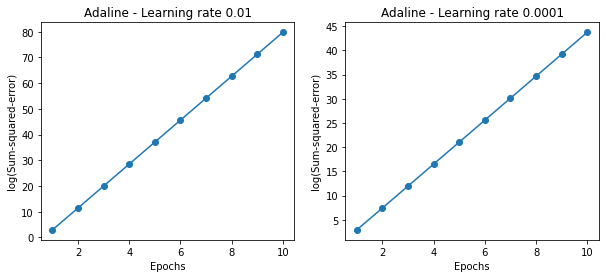

In [ ]:
# 描画等をしてみる
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

    # 勾配降下法によるADALINEの学習(学習率eta=0.01)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
# エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')

    # 勾配降下法によるADALINEの学習(学習率eta=0.0001)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
# エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[1].plot(range(1,len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
# 軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')


# print('---------------------------------------------------------------------------------------')
# print(ada1.w_)
# print(ada1.cost_)
# print(ada1.net_input(X))
# print(ada1.activation(X))
# print(ada1.predict(X))
# print('---------------------------------------------------------------------------------------')

# 図の表示
plt.show()

#### 標準化っぽい事

In [ ]:
# データのコピーを行う
X_std = np.copy(X)
# print(X)
# print(X.iloc[:445,:5])

# Xのデータ型はpandasのdataframeだが、X_stdのデータ型はnumpyのndarray
# print(type(X))
# print(type(X_std))

# dataframeはiloc,ndarrayはスライスを適用できる。。
for a in range(10):
    X_std[:,a] = (X.iloc[:,a] - X.iloc[:,a].mean()) / X.iloc[:,a].std()

print(X_std.shape)    

(445, 10)


##### 横軸：エポック回数、縦軸：コスト関数

> etaが0.1等大きすぎるとうまく収束しない

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

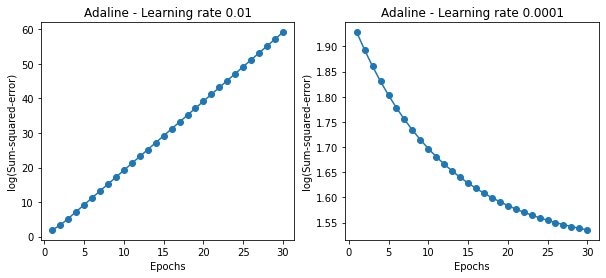

In [ ]:
# 描画等をしてみる
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

    # 勾配降下法によるADALINEの学習(学習率eta=0.01)
ada1 = AdalineGD(n_iter=30, eta=0.01).fit(X_std,y)
# エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')

    # 勾配降下法によるADALINEの学習(学習率eta=0.0001)
ada2 = AdalineGD(n_iter=30, eta=0.0001).fit(X_std,y)
# エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[1].plot(range(1,len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
# 軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')



# plot_decision_regions(X_std,y,classifier=ada)
# plt.title('Adaline - Gradient Descent')
# plt.xlabel('・・・・')
# plt.ylabel('・・・・')
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

# # 
# plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
# plt.xlabel('Epochs')
# plt.ylabel('Sum-squared-error')
# plt.tight_layout()
# plt.show()

### 確率的勾配降下法の実装

#### クラス定義

In [ ]:
from numpy.random import seed

class AdalineSGD(object):
    '''ADAptive LInear NEuron 分類器

    パラメータ
    ---------------------
    eta : float
        学習率(0.0より大きく1.0以下の値)
    n_iter : int
        トレーニングデータのトレーニング回数
    shuffle : bool(デフォルト：True)
        Trueの場合は、循環を回避するためにエポックごとにトレーニングデータをシャッフル
    random_state : int
        重みを初期化するための乱数シード

    属性
    --------------------
    w_ : 1次元配列
        適合後の重み
    cost_: リスト
        各エポックで全てのトレーニングサンプルの平均を求める誤差平方和コスト関数

    '''
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 重みの初期化フラグはFalseに設定
        self.w_initialized = False
        # 各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        # 乱数シードを設定
        self.random_state = random_state

    def fit(self, X, y):
        '''トレーニングデータに適合させる

        パラメータ
        ----------------
        X : {配列のようなデータ構造}、shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数、n_featuresは特徴量の個数
        y : 配列のようなデータ構造、 shape = [n_samples]
            目的変数
        
        戻り値
        ----------------
        self : object

        '''
        # 重みベクトルの生成
        self._initialize_weights(X.shape[1])
        # コストを格納するリストの生成
        self.cost_ = []
        # トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            # 指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            # 各サンプルのコストを格納するリストの生成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストの計算
            avg_cost = sum(cost)/len(y)
            # 平均コストを格納
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self,X, y):
        '''重みを再初期化することなくトレーニングデータに適合させる'''
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        #目的変数yの要素数が2以上の場合は各サンプルの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        # 目的変数yの要素数が1の場合はサンプル全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self, X,y):
        '''トレーニングデータをシャッフル'''
        r = self.rgen.permutation(len(y))
        # 今回、Xが二次元配列のため、スライスの指定の仕方に注意する。
        # 直ぐ下のセルを実行する場合、Xのデータ型はnumpyのndarray、yのデータ型はpandasのSeriesである
        return X[r,:], y.iloc[r]

    def _initialize_weights(self, m):
        '''重みを小さな乱数に初期化'''
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        '''ADALINEの学習規則を用いて重みを更新'''
        # 活性化関数の出力の計算
        output = self.activation(self.net_input(xi))
        # 誤差の計算
        error = (target - output)
        # 重みw1, ..., wmの更新
        self.w_[1:] += self.eta * xi.dot(error)
        # 重みw0の更新
        self.w_[0] += self.eta * error
        # コストの計算
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self, X):
        '''総入力を計算'''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        '''線形活性化関数の出力を計算'''
        return X

    def predict(self, X):
        '''1ステップ後のクラスラベルを返す'''
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, 0)
            

#### 描画

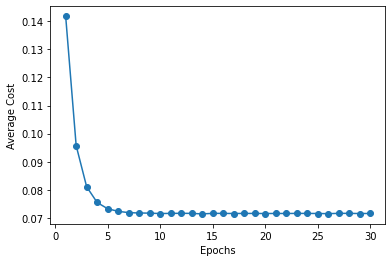

In [ ]:
# 確率的勾配降下法によるADALINEの学習
ada = AdalineSGD(n_iter=30, eta=0.001, random_state=1)
# モデルへの適合
ada.fit(X_std,y)
# エポックのコストの折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
# 軸ラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

#### 予測結果の投稿

##### 確率的勾配降下法の予測結果を投稿してみる

In [ ]:
pred = ada.predict(X_std)
# print(pred)
pred = np.insert(pred,0,1)
print(pred)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
#提出用データに予測した値を格納する 
submit_df[1] = pred
submit_df.to_csv('adaSGD_submit.tsv', header=None, sep='\t')

In [ ]:
# !signate submit -c 102 -n "first submit from google colab" adaSGD_submit.tsv

You have successfully submitted your predictions.We will send you the submission result to your email address.


## scikit-learn使用

### いろいろ試す

訓練データ、検証データを改めて定義

In [ ]:
y_train = train_df["survived"] # 目的変数
X_train = train_df.drop(["survived"], axis=1) # 目的変数を除いたデータ
X_test = test_df

In [ ]:
from sklearn.preprocessing import StandardScaler
# 特徴量のスケーリング(特徴量の標準化)を行う
sc = StandardScaler()
sc.fit(X)
# 平均と標準偏差を用いて標準化する
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# パーセプトロンをsklearnで

from sklearn.linear_model import Perceptron
# パーセプトロンのインスタンス化
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std,y)
# 予測する
y_pred = ppn.predict(X_test_std)

# 誤分類のサンプルの個数を表示する
print('Misclassified samples: %d' % (y_test != y_pred).sum())

NameError: ignored